Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Load and normalize the data

In [7]:
training_set = np.genfromtxt('training_set.csv', delimiter=',')
validation_set = np.genfromtxt('validation_set.csv', delimiter=',')

x_train, y_train = np.hsplit(training_set, [-1])
x_val, y_val = np.hsplit(validation_set, [-1])

x_train = (x_train - x_train.mean())/x_train.std()
x_val = (x_val - x_val.mean())/x_val.std()

Initialize weights and biases

In [8]:
nr_hidden = 25
epochs = 200
learning_rate = 0.005

hidden_w = np.random.normal(scale=1, size=(nr_hidden,2))
hidden_theta = np.zeros((nr_hidden,1))

output_w = np.random.normal(scale=1, size=(1,nr_hidden))
output_theta = np.zeros((1,1))

Training

In [13]:
c_list = []
sub_12 = True
counter = 0

while sub_12:
    if counter % 10 == 0:
        print(counter)
    for  i in range(len(x_train)):
        
        random_input = np.random.randint(0, len(x_train))
        v = np.tanh(np.subtract(np.dot(hidden_w, x_train[random_input]), hidden_theta[:,0]))
        output = np.tanh(np.subtract(np.dot(output_w, v), output_theta[:,0]))
    

        error = y_train[random_input] - output
        delta1 = 1-np.tanh(np.subtract(np.dot(output_w, v), output_theta[:,0]))**2
        delta2 = delta1 * (1-np.tanh(np.subtract(np.dot(hidden_w, x_train[random_input]), hidden_theta[:,0]))**2)
        
        delta_output = error * delta1
        delta_hidden = error * delta2

        output_w = output_w + learning_rate * delta_output * v
        hidden_w = hidden_w + learning_rate * delta_hidden.reshape(nr_hidden,1) * np.transpose(x_train[random_input].reshape(2,1))
        
        hidden_theta -= (learning_rate * delta_hidden).reshape(nr_hidden,1)
        output_theta -= learning_rate * delta_output

    if counter% 10 == 0:
        output_list = []
        for k in range(len(validation_set)):    
            v_val = np.tanh(np.subtract(np.dot(hidden_w, x_val[k]), hidden_theta[:,0]))
            output = np.tanh(np.subtract(np.dot(output_w, v_val), output_theta[:,0]))
            output_list.append(output)
    
        c = np.sum(np.abs(np.subtract(np.sign(output_list),y_val)))/(2*len(validation_set))
        c_list.append(c)

        if c < 0.12 or counter > 200:
            sub_12 = False
    
    counter += 1

0
10
20
30
40
50
60
70
80
90


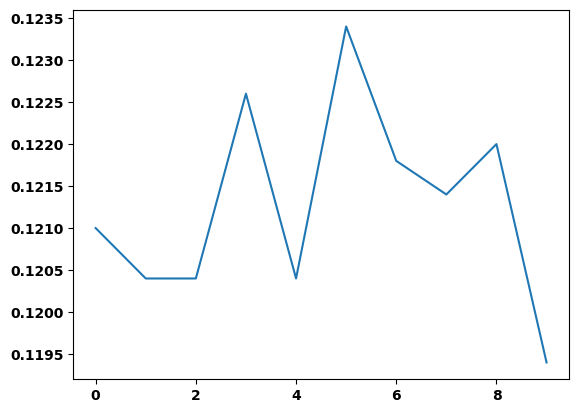

In [14]:
plt.plot(c_list)

In [21]:
np.savetxt("w1.csv", hidden_w, delimiter=",", fmt='%s')
np.savetxt("w2.csv", output_w, delimiter=",", fmt='%s')
np.savetxt("t1.csv", hidden_theta, delimiter=",", fmt='%s')
np.savetxt("t2.csv", output_theta, delimiter=",", fmt='%s')